In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data=pd.read_csv(r"kmeans.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

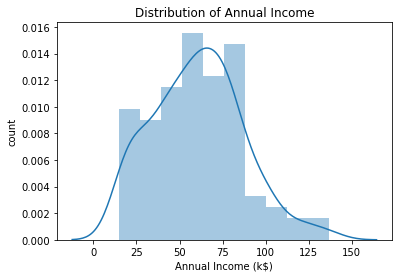

In [7]:
plt.plot(figSize=(10,9))
sns.distplot(data["Annual Income (k$)"])
plt.title("Distribution of Annual Income")
plt.ylabel("count")

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

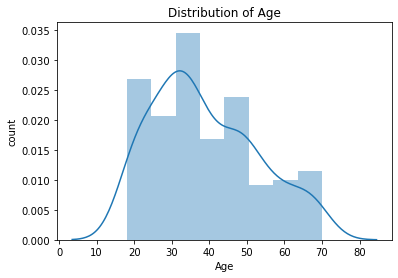

In [8]:
plt.plot(figSize=(10,9))
sns.distplot(data["Age"])
plt.title("Distribution of Age")
plt.ylabel("count")

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

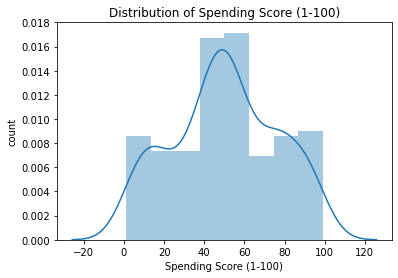

In [9]:
plt.plot(figSize=(10,9))
sns.distplot(data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)")
plt.ylabel("count")

<AxesSubplot:>

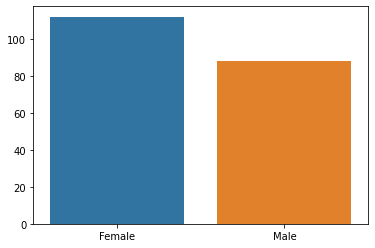

In [11]:
gender=data.Genre.value_counts()
sns.barplot(x=gender.index,y=gender.values)

In [15]:
from sklearn.cluster import KMeans
df=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
x=data[["Annual Income (k$)","Spending Score (1-100)"]];

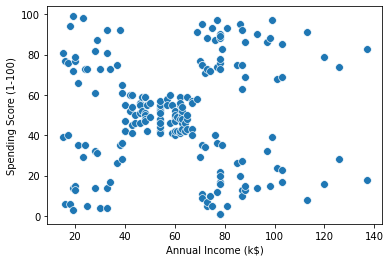

In [23]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=x,s=60)
plt.show()

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


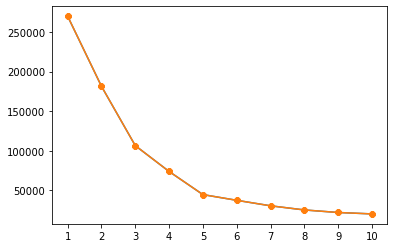

In [24]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,marker="8")
plt.xticks(np.arange(1,11,1))
plt.show()

In [27]:
km1=KMeans(n_clusters=5)
km1.fit(x)
y=km1.predict(x)
df['label']=y
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


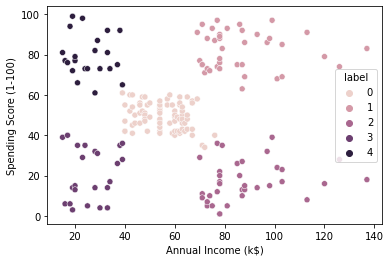

In [28]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df,hue="label")
plt.show()